In [45]:
import warnings
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = pd.read_csv("take-home_exercise_data.csv")
data.head()

,Unnamed: 0,prospectid,ordernumber,ordercreatedate,regtenure,customer_type_group,dnatestactivationdayid,daystogetresult_grp,dna_visittrafficsubtype,xsell_gsa,xsell_day_exact
0,1,93771712,127707306,2014-11-28,More than 120 days old,Existing Reg,2014-12-10,4 weeks,NaN,1,38.0
1,2,123112555,114401425,2013-12-05,Order prior to reg,New Reg,2014-01-13,4 weeks,NaN,1,40.0
2,3,171965960,159656050,2016-11-25,Order prior to reg,New Reg,NaN,-1,Paid Search Non Brand,0,NaN
3,4,175522116,165370285,2017-03-08,<=60 days,Existing Reg,NaN,-1,Email Programs,0,NaN
4,5,149288086,132837125,2015-03-30,Order prior to reg,New Reg,2015-04-06,4 weeks,NaN,0,NaN


In [59]:
data.daystogetresult_grp.unique()

array(['4 weeks', '-1', '6 weeks', '5 weeks', '3 weeks', '7 weeks',
       '10 weeks', '2 weeks', '>10weeks', '9 weeks', '8 weeks', '1 week'],
      dtype=object)

In [47]:
data.isna().sum()

Unnamed: 0                      0
prospectid                      0
ordernumber                     0
ordercreatedate                 0
regtenure                       0
customer_type_group             0
dnatestactivationdayid      73097
daystogetresult_grp             0
dna_visittrafficsubtype     62849
xsell_gsa                       0
xsell_day_exact            211363
dtype: int64

# Exploratory Data Analysis

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251942 entries, 0 to 251941
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               251942 non-null  int64  
 1   prospectid               251942 non-null  int64  
 2   ordernumber              251942 non-null  int64  
 3   ordercreatedate          251942 non-null  object 
 4   regtenure                251942 non-null  object 
 5   customer_type_group      251942 non-null  object 
 6   dnatestactivationdayid   178845 non-null  object 
 7   daystogetresult_grp      251942 non-null  object 
 8   dna_visittrafficsubtype  189093 non-null  object 
 9   xsell_gsa                251942 non-null  int64  
 10  xsell_day_exact          40579 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 21.1+ MB


So, we can see that there are six object data types which we need to convert into int data types

In [49]:
data['Date'] = data.ordercreatedate.apply(lambda x: x.split('-')[2])
data['Month'] = data.ordercreatedate.apply(lambda x: x.split('-')[1])
data['Year'] = data.ordercreatedate.apply(lambda x: x.split('-')[0])
data['Date'] = data['Date'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)

In [50]:
data = data.drop('ordercreatedate', axis=1)

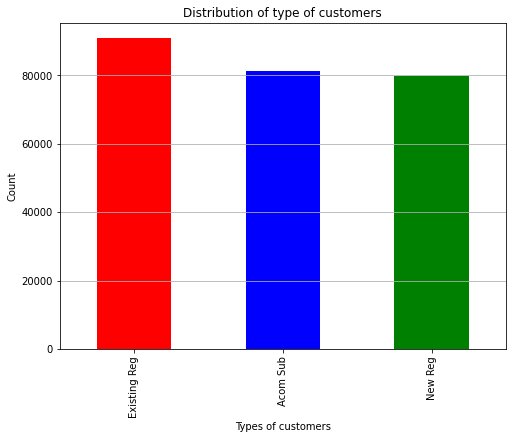

In [51]:
value_counts = data.customer_type_group.value_counts()
plt.figure(figsize=(8, 6))
colors = {'Existing Reg': 'red', 'New Reg': 'green', 'Acom Sub': 'blue'}
value_counts.plot(kind='bar', color=[colors[key] for key in value_counts.index])


plt.title('Distribution of type of customers')
plt.xlabel('Types of customers')
plt.ylabel('Count')

plt.grid(axis='y')
plt.show()

In [52]:
data.describe()

,Unnamed: 0,prospectid,ordernumber,xsell_gsa,xsell_day_exact,Date,Month,Year
count,251942.000000,2.519420e+05,2.519420e+05,251942.000000,40579.000000,251942.000000,251942.000000,251942.000000
mean,125971.500000,1.144561e+08,1.455821e+08,0.161065,140.674043,16.471176,7.119583,2015.438462
std,72729.535098,5.277515e+07,1.752503e+07,0.367591,668.588251,8.975839,3.835034,1.419499
min,1.000000,7.600000e+02,9.592366e+07,0.000000,0.000000,1.000000,1.000000,1900.000000
25%,62986.250000,7.189144e+07,1.356459e+08,0.000000,0.000000,9.000000,3.000000,2015.000000
50%,125971.500000,1.243254e+08,1.504135e+08,0.000000,22.000000,17.000000,7.000000,2016.000000
75%,188956.750000,1.649072e+08,1.599612e+08,0.000000,100.000000,25.000000,11.000000,2016.000000
max,251942.000000,1.795105e+08,1.667366e+08,1.000000,42302.000000,31.000000,12.000000,2017.000000


Based on this function we can say that mean, standard deviation in 'xsell_day_exact' have a very large difference, which indicates the column data is spread much wide.

The maximum value is very large compared with mean, which indicates there can be a outlier

# Cross-Sell vs Non Cross-Sell

We consider a customer to be a cross sell (from DNA to ACOM subscription) when the
following conditions are met in the data:

In [53]:
mask = (data.xsell_gsa == 1) & (data.xsell_day_exact <= 120)
cross_sell_data = data[mask]


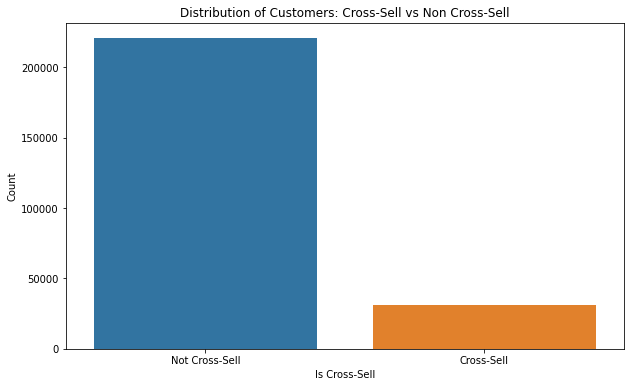

In [54]:
# Creating a new column 'is_cross_sell' to indicate whether a customer is a cross-sell or not
data['is_cross_sell'] = (mask).astype(int)

# Plotting the distribution of customers who are cross-sell and who are not
plt.figure(figsize=(10, 6))
sns.countplot(x='is_cross_sell', data=data)
plt.title('Distribution of Customers: Cross-Sell vs Non Cross-Sell')
plt.xlabel('Is Cross-Sell')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Cross-Sell', 'Cross-Sell'])
plt.show()

What fraction of the observed customers cross-sell to subscription?

In [55]:
Percentage = len(cross_sell_data)/len(data) * 100
print(f"The percentage is: {Percentage:.2f}%")

The percentage is: 12.39%


dna_visittrafficsubtype - DNA Traffic visit channel, example: ‘Paid Search Non
Brand’

There are a lot of null values in 'dna_visittrafficsubtype' column, so we fill them with 'unknown source' as we don't how the customer got to know about the product

In [56]:
data.dna_visittrafficsubtype.fillna('unknown source', inplace=True)
value_counts = data.dna_visittrafficsubtype.value_counts()

# Display the counts
print(value_counts)

dna_visittrafficsubtype
unknown source                              62849
direct core homepage                        39719
paid search – dna brand                     20905
Email Campaigns                             20081
Paid Search Non Brand                       13400
internal referrals                          12296
direct non-homepage                         12288
paid search – core brand                    10425
organic dna brand                            9205
Email Programs                               8642
direct dna homepage                          7610
email no source id                           6693
organic core brand                           6341
External Paid Media                          4911
Affiliate External                           4066
organic nonbrand                             3569
geo-redirect                                 1536
iOS App                                      1534
Paid Search GDN                              1348
content marketing         

This is a plot to view top ten types of campaigns brought more traffic 

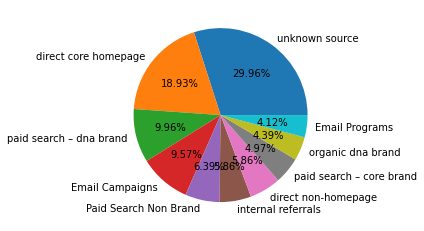

In [57]:
Campaign_type = data.dna_visittrafficsubtype.value_counts().index   #prints unique index values of the Column [Country]
Val_count = data.dna_visittrafficsubtype.value_counts().values
plt.pie(Val_count[:10], labels=Campaign_type[:10],autopct='%.2f%%')
plt.gca().set_facecolor('white')

There is a suggestion I would like to make on this data

So, We need to check how many customers are above 120 days and below 180 days time period (The time period is upto us based on the number of customers in that time period), then there is a pretty good chance that we could covert them into cross-sell customers. 

In [58]:
counts = data[(data.xsell_day_exact < 180) & (data.xsell_day_exact > 120)] 
len(counts)

1397